In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing useful function
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Algorithm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
# 載入經過前處理的資料集
df = pd.read_csv("new_airline_passenger_satisfaction.csv")
df

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type_Loyal Customer,type_of_travel_Business travel,customer_class_Business,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,1,0,0,0,1,0
1,25,235,3,3,1,3,1,1,1,5,3,1,4,1,0,1,1,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,1,1,1,0,0,1
3,25,562,2,5,2,2,2,2,2,5,3,1,4,2,1,1,1,0,0,0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,34,526,3,3,4,3,4,4,3,2,4,4,5,4,0,1,1,0,0,0
129483,23,646,4,4,4,4,4,4,4,5,5,5,5,4,1,1,1,0,0,1
129484,17,828,2,1,2,1,2,2,4,3,4,5,4,2,1,0,0,1,0,0
129485,14,1127,3,3,4,4,4,4,3,2,5,4,5,4,1,1,1,0,0,1


In [3]:
# 使用 minimax scaling 正規化技術       把資料尺度轉到0~1
MMscaler = MinMaxScaler(feature_range=(0, 1))
scaling = MMscaler.fit_transform(df)
scaled_data = pd.DataFrame(data = scaling)
scaled_data.columns = [i for i in df.columns]
scaled_data.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type_Loyal Customer,type_of_travel_Business travel,customer_class_Business,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,0.076923,0.086632,0.6,0.6,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.230769,0.041195,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.0,1.0,1.0,0.0,0.0,0.0
2,0.243590,0.224354,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,1.0,1.0,1.0,0.0,0.0,0.0
4,0.692308,0.036955,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,1.0,1.0,1.0,0.0,0.0,1.0


In [4]:
# 設定因變數 x with minimax
scaled_x = scaled_data.drop(['satisfaction_satisfied'], axis = 1).copy()

# 設定目標變數 y with minimax
scaled_y = scaled_data['satisfaction_satisfied'].copy()
scaled_y = scaled_y.astype(int)
scaled_y

0         0
1         0
2         1
3         0
4         1
         ..
129482    0
129483    1
129484    0
129485    1
129486    0
Name: satisfaction_satisfied, Length: 129487, dtype: int32

In [5]:
# Split the data (split into 67% training data & 33% testing data) (lock seed) 
scaled_x_train, scaled_x_test, scaled_y_train, scaled_y_test = train_test_split(scaled_x, scaled_y, test_size = 0.33, random_state = 100)

In [6]:
print('scaled_y_train:',Counter(scaled_y_train))
print('------------------------------------')
print('scaled_y_test :',Counter(scaled_y_test))

scaled_y_train: Counter({0: 48903, 1: 37853})
------------------------------------
scaled_y_test : Counter({0: 24322, 1: 18409})


# 模型訓練

In [7]:
# Fit the model with KNeighborsClassifier function
scaling_model = KNeighborsClassifier(n_neighbors = 3, algorithm = 'brute', metric = 'minkowski', p = 2, n_jobs = -1)
scaling_model.fit(scaled_x_train, scaled_y_train)

# Show result: out-of-sample testing
# Training result
training_prediction = scaling_model.predict(scaled_x_train)
training_acc = accuracy_score(scaled_y_train, training_prediction)   # Accuracy
training_f1s = f1_score(scaled_y_train, training_prediction, pos_label=1) # f1 score
training_pre = precision_score(scaled_y_train, training_prediction, pos_label=1)  # precision
training_sen = sensitivity_score(scaled_y_train, training_prediction, pos_label=1) #sensitivity
training_spe = specificity_score(scaled_y_train, training_prediction, pos_label=1)    #specificity
training_cm = confusion_matrix(scaled_y_train, training_prediction)  #confusion matrix

print('+========================+')
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')

# Testing result
testing_prediction = scaling_model.predict(scaled_x_test)
testing_acc = accuracy_score(scaled_y_test, testing_prediction)
testing_f1s = f1_score(scaled_y_test, testing_prediction, pos_label = 1)
testing_pre = precision_score(scaled_y_test, testing_prediction, pos_label = 1)
testing_sen = sensitivity_score(scaled_y_test, testing_prediction, pos_label = 1)
testing_spe = specificity_score(scaled_y_test, testing_prediction, pos_label = 1)
testing_cm = confusion_matrix(scaled_y_test, testing_prediction)

print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

+========================+
Training result:
Training ACC: 96.18
Training f1s: 95.54
Training pre: 97.39
Training sen: 93.76
Training spe: 98.05

Training confusion matrix:
[[47951   952]
 [ 2363 35490]]
+-----------------------------------------+
Testing result:
Testing ACC: 93.33
Testing f1s: 92.03
Testing pre: 94.86
Testing sen: 89.36
Testing spe: 96.34

Testing confusion matrix:
[[23431   891]
 [ 1958 16451]]


c:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


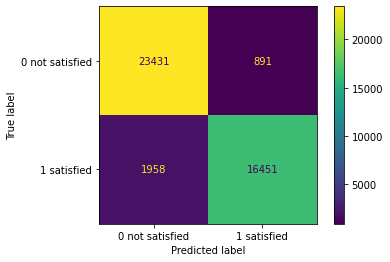

In [8]:
plot_confusion_matrix(scaling_model,scaled_x_test,scaled_y_test,display_labels=["0 not satisfied","1 satisfied"])

In [9]:
CV3F_acc = cross_val_score(scaling_model, scaled_x_train, scaled_y_train, cv = 3, scoring = 'accuracy')
print('Each fold ACC:', CV3F_acc)
print('Average ACC:', round((np.mean(CV3F_acc))*100,2), '+/-', round((np.std(CV3F_acc))*100,2))

Each fold ACC: [0.92838618 0.92959646 0.93032022]
Average ACC: 92.94 +/- 0.08


# 超參數調參過程

In [ ]:
K=[9, 27, 43, 75, 99]
max_K = 0
for k in K: 
    model_knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'brute', metric = 'minkowski', p = 2, n_jobs = -1)
    model_knn.fit(scaled_x_train,scaled_y_train)
    CV3F_knn_acc = cross_val_score(model_knn, scaled_x_train, scaled_y_train, cv = 3, scoring = 'accuracy')
    CV3F_knn_pre = cross_val_score(model_knn, scaled_x_train, scaled_y_train, cv = 3, scoring = 'precision')
    CV3F_knn_f1 = cross_val_score(model_knn, scaled_x_train, scaled_y_train, cv = 3, scoring = 'f1')
    CV3F_knn_recall = cross_val_score(model_knn, scaled_x_train, scaled_y_train, cv = 3,scoring = 'recall')

    acc = np.array_split(CV3F_knn_acc, 3)
    pre = np.array_split(CV3F_knn_pre, 3)
    recall = np.array_split(CV3F_knn_recall, 3)

    z = np.array([])
    for i in range(len(acc)):
        a = 1
        b = (1-recall[i])/recall[i]
        c = (1-pre[i])/pre[i]
        d = (acc[i]+acc[i]*b+acc[i]*c-1)/(1-acc[i])
        SPE = c/(c+d)
        z = np.append(z,SPE)

    print('Training result')
    print("n_neighbors = ",k)
    print("+---------------------------------------------------------------------------------------------+")
    print('Each fold ACC:',CV3F_knn_acc)
    print('Average ACC:',round((np.mean(CV3F_knn_acc))*100,2),'+/-',round((np.std(CV3F_knn_acc))*100,2))
    print("+---------------------------------------------------------------------------------------------+")
    print('Each fold SEN:',CV3F_knn_recall)
    print('Average SEN:',round((np.mean(CV3F_knn_recall))*100,2),'+/-',round((np.std(CV3F_knn_recall))*100,2))
    print("+---------------------------------------------------------------------------------------------+")
    print('Each fold SPE:',z)
    print('Average SPE:',round((np.mean(z))*100,2),'+/-',round((np.std(z))*100,2))
    print("+---------------------------------------------------------------------------------------------+")
    print('Each fold precision:',CV3F_knn_pre)
    print('Average precision:',round((np.mean(CV3F_knn_pre))*100,2),'+/-',round((np.std(CV3F_knn_pre))*100,2))
    print("+---------------------------------------------------------------------------------------------+")
    print('Each fold f1-score:',CV3F_knn_f1)
    print('Average f1-score:',round((np.mean(CV3F_knn_f1))*100,2),'+/-',round((np.std(CV3F_knn_f1))*100,2))
    print("+---------------------------------------------------------------------------------------------+")
    print("\n")

    if round((np.mean(CV3F_knn_acc))*100,2) > max_K:
        max_K = k
print("最佳超參數 K : ", max_K)

Training result
n_neighbors =  9
+---------------------------------------------------------------------------------------------+
Each fold ACC: [0.93049552 0.93101421 0.93308666]
Average ACC: 93.15 +/- 0.11
+---------------------------------------------------------------------------------------------+
Each fold SEN: [0.8808052  0.88286575 0.88356979]
Average SEN: 88.24 +/- 0.12
+---------------------------------------------------------------------------------------------+
Each fold SPE: [0.03104104 0.03171585 0.0285872 ]
Average SPE: 3.04 +/- 0.13
+---------------------------------------------------------------------------------------------+
Each fold precision: [0.95645439 0.95564897 0.95987601]
Average precision: 95.73 +/- 0.18
+---------------------------------------------------------------------------------------------+
Each fold f1-score: [0.91707237 0.91781668 0.92014362]
Average f1-score: 91.83 +/- 0.13
+---------------------------------------------------------------------------

Testing ACC: 93.62
Testing f1s: 92.32
Testing pre: 95.94
Testing sen: 88.96
Testing spe: 97.15


c:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


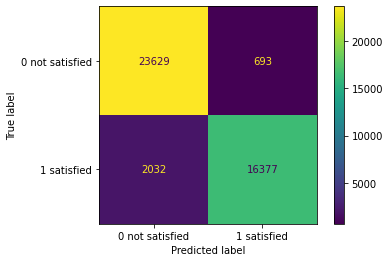

In [ ]:
# Best Model
model_knn = KNeighborsClassifier(n_neighbors = max_K, algorithm = 'brute', metric = 'minkowski', p = 2, n_jobs = -1)
model_knn.fit(scaled_x_train,scaled_y_train)

# Evaluate with testing data set
final_model_testing_prediction = model_knn.predict(scaled_x_test)
final_model_testing_acc = accuracy_score(scaled_y_test,final_model_testing_prediction)
final_model_testing_f1s = f1_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_pre = precision_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_sen = sensitivity_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_spe = specificity_score(scaled_y_test,final_model_testing_prediction,pos_label=1)

print('Testing ACC:', round(final_model_testing_acc*100,2))
print('Testing f1s:', round(final_model_testing_f1s*100,2))
print('Testing pre:', round(final_model_testing_pre*100,2))
print('Testing sen:', round(final_model_testing_sen*100,2))
print('Testing spe:', round(final_model_testing_spe*100,2))
plot_confusion_matrix(model_knn, scaled_x_test, scaled_y_test, display_labels=["0 not satisfied","1 satisfied"])